# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


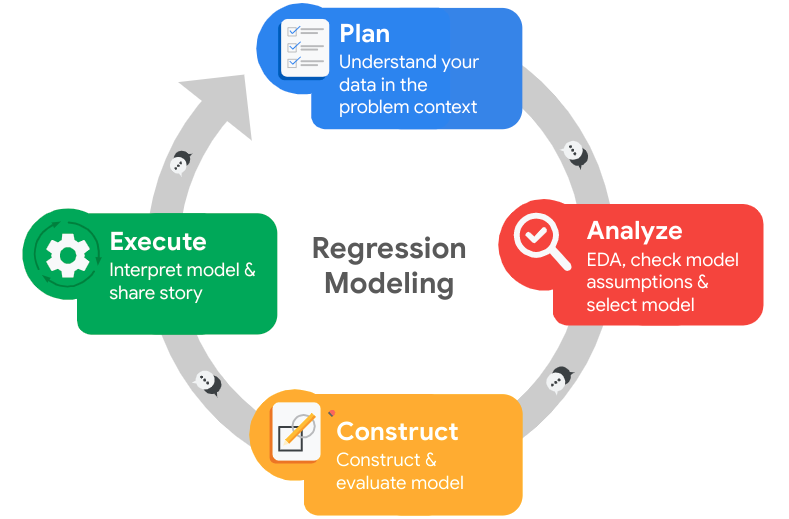

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?

### Answer:
* Stakeholders for this project could be the HR department at Salifort Motors and the vice president of this company who is responsible for company human managerment.
* We want to develop a model to predict how possible a employee is gonna resign from the company and find out what variables could be important impacts for employees' leaving, furthermore we want to get some insights about how to reduce employee leaving situation.
* This dataset contains data with 10 columns and in total 14999 records.
* We only used the HR dataset provided
* Yes, I'm worried about that if this project contains any personal information that can directly reflect specific employees.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 
# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("/Users/mavehw/Downloads/HR_comma_sep.csv")
# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [104]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [105]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns= {'average_montly_hours':'average_monthly_hours'},inplace = True)
df0.rename(columns={'Work_accident':'work_accident'},inplace = True)
# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [5]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

* We can see that there is no null records in this dataset.

### Check duplicates

Check for any duplicate entries in the data.

In [6]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [7]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [8]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
data = df0.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


* There are in total 3008 duplicated rows in this dataset, we droped all duplicated records before we processing further.

### Check outliers

Check for outliers in the data.

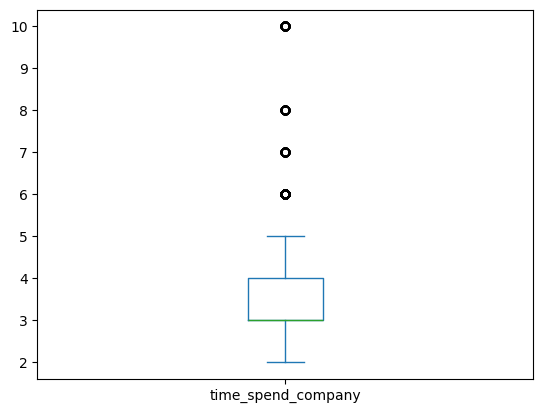

In [9]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

data.plot(kind='box',y= 'time_spend_company')
plt.show()

In [10]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = data['time_spend_company'].quantile(0.25)
q3 = data['time_spend_company'].quantile(0.75)
iqr = q3 - q1
# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_threshold = q3 + 1.5 * iqr
lower_threshold = q1 - 1.5 * iqr
print("Lower limit:", lower_threshold)
print("Upper limit:", upper_threshold)

# Identify subset of data containing outliers in `tenure`
outliers = data[(data['time_spend_company'] > upper_threshold) | (data['time_spend_company'] < lower_threshold)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `time_spend_company`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `time_spend_company`: 824


* There are in total 824 outliers in the time_spend_company column, because the final step of this project is building some models using this dataset, as some certain types of models are more sensitive to outliers than others, so we will considering about whether we need to remove these outliers before we develping models in specific situations.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [11]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
data[data['left']== 0].count()
data[data['left']== 1].count()
print(data['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(data['left'].value_counts(normalize =True))

#data[data['left']== 0].count()/data[data['left']== 1].count()


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


* The distribution of number of employee left status is not so balanced, only 16.6% of all employees are leaving the company.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

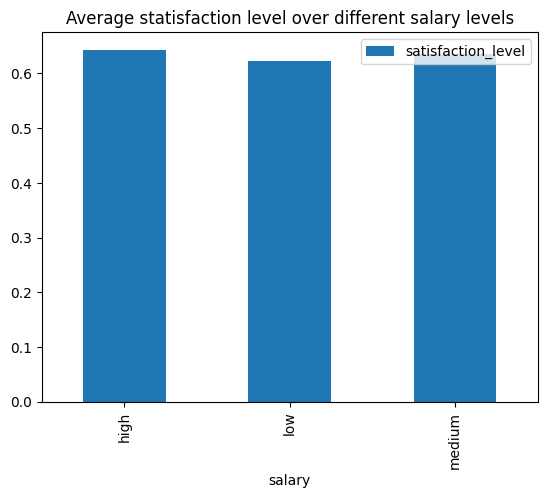

In [12]:
# Create a plot as needed
### YOUR CODE HERE ###
data_mean = data.groupby('salary')['satisfaction_level'].mean().reset_index()
data_mean.plot(kind='bar', x= 'salary',y= 'satisfaction_level',title ='Average statisfaction level over different salary levels')

plt.show()

* From this bar chart we can see that the employee satisfaction levels at the three salary levels are relatively close. On average, higher salaries do not bring higher employee satisfaction.

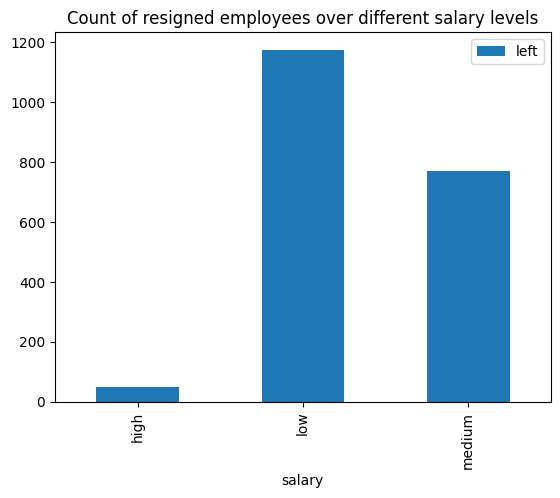

In [13]:
data_mean = data[data['left']==1].groupby('salary')['left'].count().reset_index()
data_mean.plot(kind='bar', x= 'salary',y= 'left',title='Count of resigned employees over different salary levels')
plt.show()

* From this chart of ''Count of resigned employees over different salary levels'', we can see that employees in low-salary levels have the highest turnover rate. However, this information alone cannot directly determine that employees in low-salary levels are more likely to leave, because the number of employees in different salary levels is not equal. The number of employees in low-salary levels may be much larger than other levels. Therefore, we need to further look at the turnover rates of different salary levels to see whether the salary level will affect employees' decisions to leave.

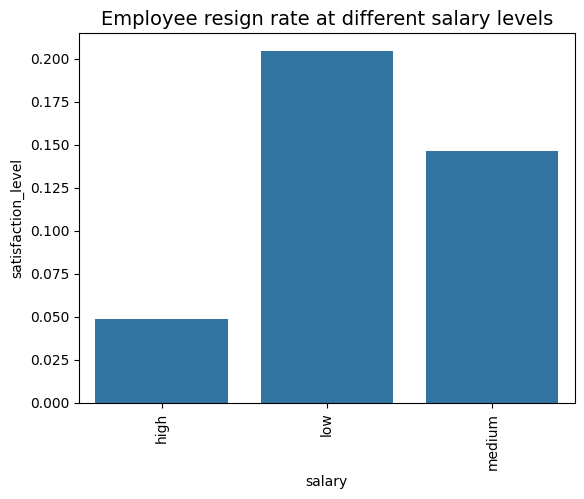

In [16]:

data_mean = data[data['left']==1].groupby(['salary']).count()/data.groupby(['salary']).count()
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't

sns.barplot(data=data_mean, x='salary',y='satisfaction_level'#,hue='salary'
            )
plt.xticks(rotation='vertical')
plt.title('Employee resign rate at different salary levels', fontsize=14)
plt.show()

* This figure shows the employee resign rate at different salary levels. It can be seen that employees with lower salary levels have the highest resign rate, and employees with higher salary levels have the lowest resign rate. From this, it can be determined that employees with lower salary levels are more inclined to resign, and employees with higher salary levels are more suitable to stay in the company.

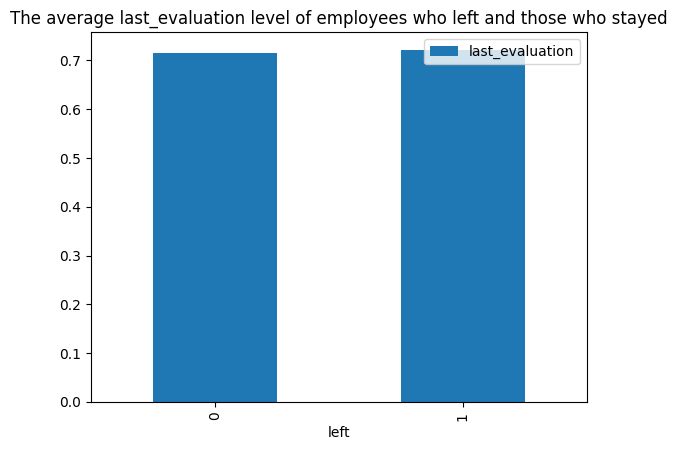

,left,last_evaluation
0,0,0.715667
1,1,0.721783


In [18]:
data_mean = data.groupby('left')['last_evaluation'].mean().reset_index()
data_mean.plot(kind='bar', x= 'left',title='The average last_evaluation level of employees who left and those who stayed')
plt.show()
data_mean

* From this chart of the average last_evaluation levels of employees who left and those who stayed, we can see that the last_evaluation levels of employees who left and those who stayed are very close, so we can assume that the last_evaluation variable itself does not have a big impact on the resignation of employees.

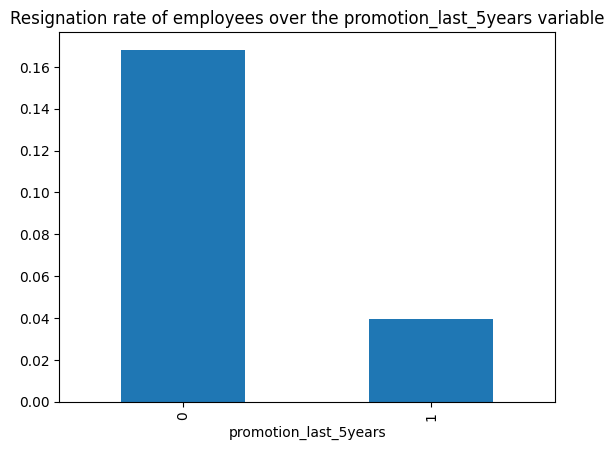

In [21]:
data_mean = data[data['left']==1].groupby('promotion_last_5years')['number_project'].count()/data.groupby('promotion_last_5years')['number_project'].count()
data_mean.plot(kind='bar', x= 'promotion_last_5years',title = 'Resignation rate of employees over the promotion_last_5years variable')
plt.show()


* From this chart, we can see that employees who have not received a promotion in the last 5 years have a much greater tendency to quit than those who have received a promotion. We can assume that the promotion_last_5_years variable has a significant impact on employee quitting.

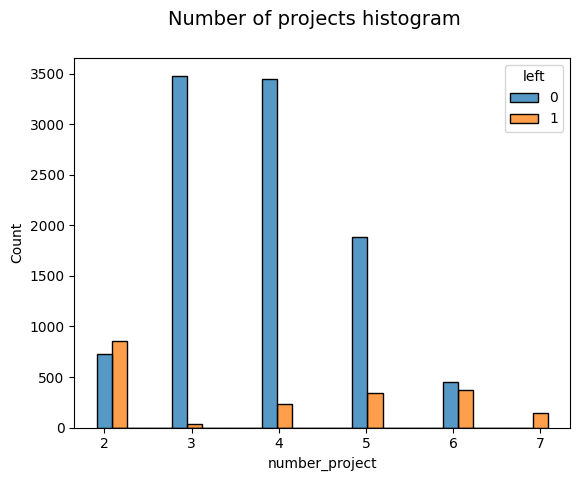

In [22]:
fig = plt.figure()
sns.histplot(data=data, x='number_project', hue='left', multiple='dodge', shrink=2)
fig.suptitle('Number of projects histogram', fontsize='14')
# Display the plots
plt.show()

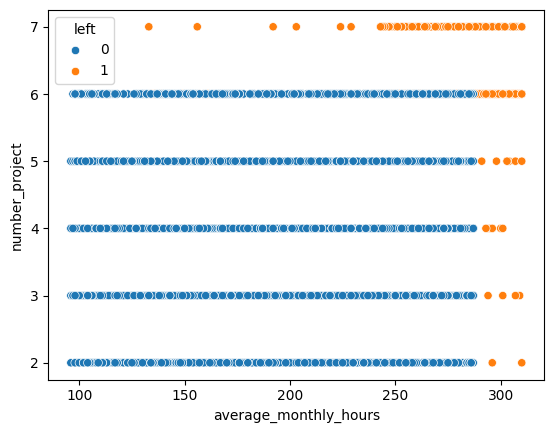

In [83]:
# Create a plot as needed
### YOUR CODE HERE ###
#data_mean = data.groupby('salary')['satisfaction_level'].mean().reset_index()
fig=plt.figure()
sns.scatterplot(data=data,x= 'average_monthly_hours',y= 'number_project',hue='left')
fig.suptitle('XDdsd')

plt.show()

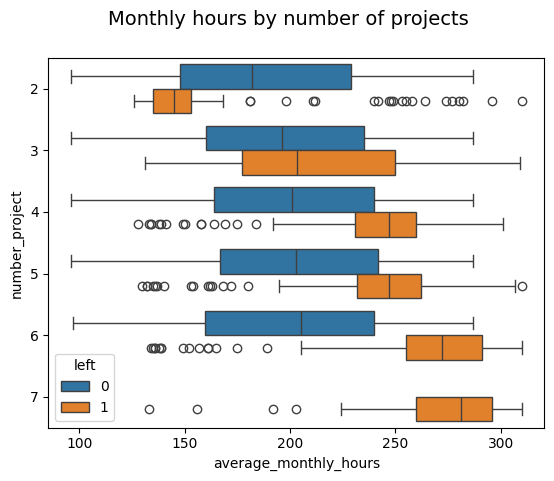

In [12]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig = plt.figure()
# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=data, x='average_monthly_hours', y='number_project', hue='left', orient="h")

fig.suptitle('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = data[data['left']==0]['number_project']
tenure_left = data[data['left']==1]['number_project']

plt.show()

* First, from the two graphs above on the variables of working time and number of projects, we can see that the optimal number of projects for an employee to stay in the company seems to be 3-4. The resignation/retention ratio for these employees is very small. We can assume that a smaller number of projects means less work for the employee, which has a positive effect on employee retention. However, we can see that the resignation rate for employees with 2 projects is also high, and the reason for this situation may be that those who are fired or have already resigned are not assigned many projects because they will definitely leave the company.

* It is perhaps natural that people who work on more projects will also work longer hours. This seems to be the case here, because the average working time of each group (those who stay and those who leave) increases with the number of projects they work on. However, some problems can be seen from this graph.

* If we assume a 40-hour work week and two weeks of vacation per year, the average working time per month for employees working Monday to Friday is `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, except for the employees who work on two projects, each group (even the employees who did not leave) works much more than this number. It seems that the employees here are overworked.

* All employees working on 7 projects have left the company, and the interquartile range for this group of employees and employees working on 6 projects is about 255-295 hours/month - much higher than the interquartile range for employees in other groups.

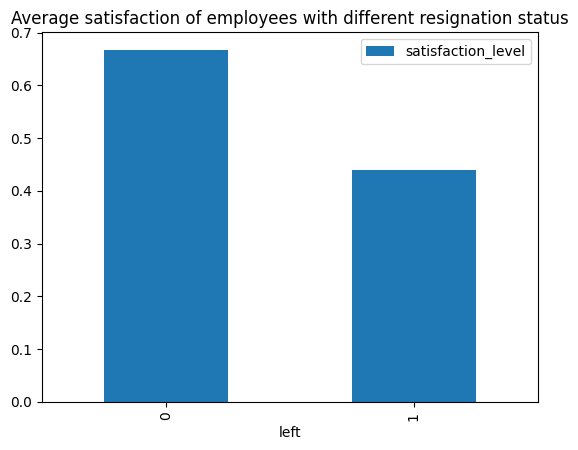

,left,satisfaction_level
0,0,0.667365
1,1,0.440271


In [167]:
# Create a plot as needed
### YOUR CODE HERE ###
data_mean = data.groupby('left')['satisfaction_level'].mean().reset_index()
data_mean.plot(kind='bar', x= 'left',title='Average satisfaction of employees with different resignation status')
plt.show()


* From the above figure we can see that the average satisfaction of employees who left is significantly lower, that is, employees who left are not as satisfied with the company as those who stayed.

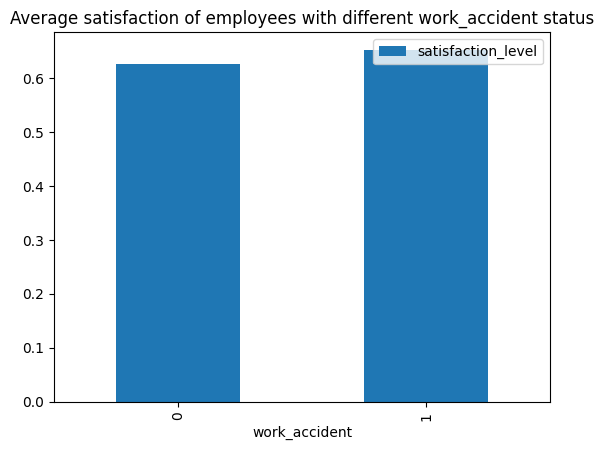

,work_accident,satisfaction_level
0,0,0.625546
1,1,0.652200


In [33]:
# Create a plot as needed
### YOUR CODE HERE ###
data_mean = data.groupby('work_accident')['satisfaction_level'].mean().reset_index()
data_mean.plot(kind='bar', x= 'work_accident',title='Average satisfaction of employees with different work_accident status')
#sns.scatterplot(data=data,x= 'satisfaction_level',y= 'left')
plt.show()
data_mean

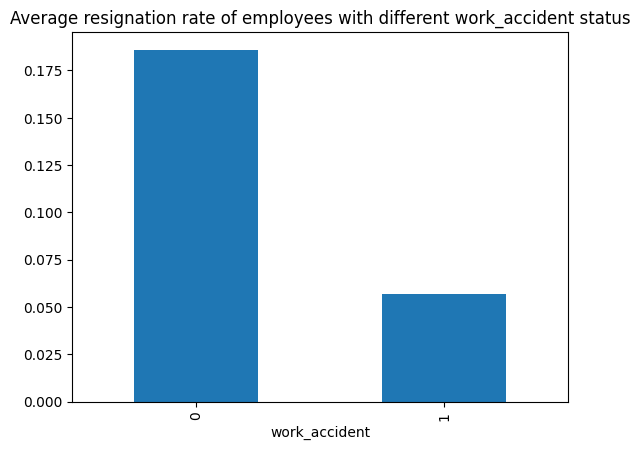

work_accident
0    0.185978
1    0.056757
Name: satisfaction_level, dtype: float64

In [34]:
# Create a plot as needed
### YOUR CODE HERE ###
data_mean = data[data['left']==1].groupby('work_accident')['satisfaction_level'].count()/data.groupby('work_accident')['satisfaction_level'].count()
data_mean.plot(kind='bar', x= 'work_accident',title='Average resignation rate of employees with different work_accident status')
#sns.scatterplot(data=data,x= 'satisfaction_level',y= 'left')
plt.show()
data_mean


* Intuitively, employees who suffer work-related accidents are less satisfied with their company and tend to leave。 but in fact, employees who suffer work-related accidents are not less satisfied with their company and are not inclined to leave.

Text(0.5, 1.0, 'Counts of stayed/left by department')

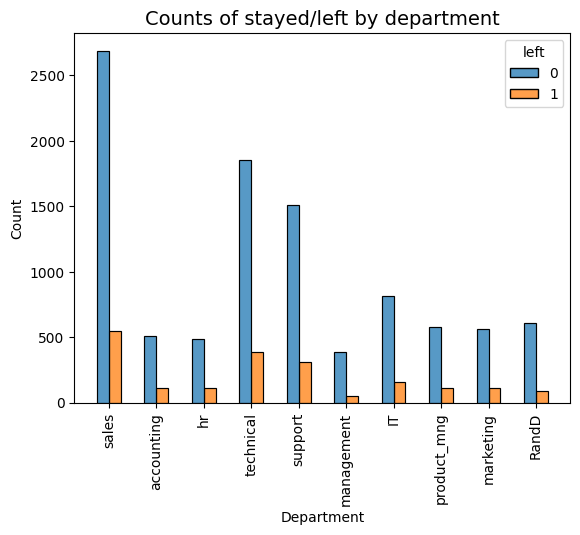

In [25]:
# Create a plot as needed 
### YOUR CODE HERE ###
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
sns.histplot(data=data, x='Department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14)


Text(0.5, 1.0, 'Resignation rate by department')

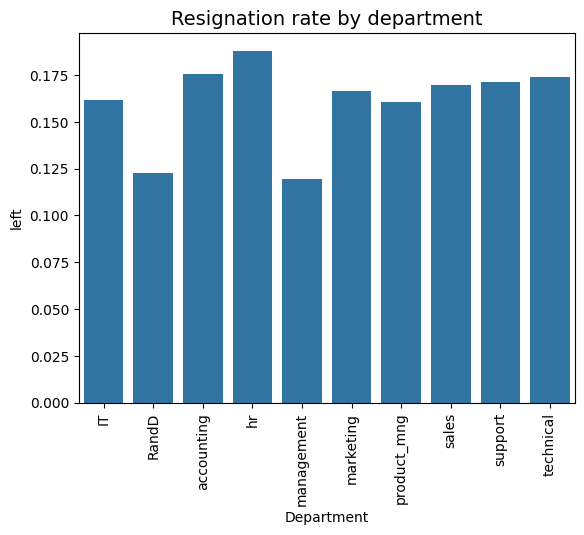

In [35]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
data_mean= data[data['left']==1].groupby('Department').count()/data.groupby('Department').count()
sns.barplot(data=data_mean, x='Department', y='left')
plt.xticks(rotation='vertical')
plt.title('Resignation rate by department', fontsize=14)


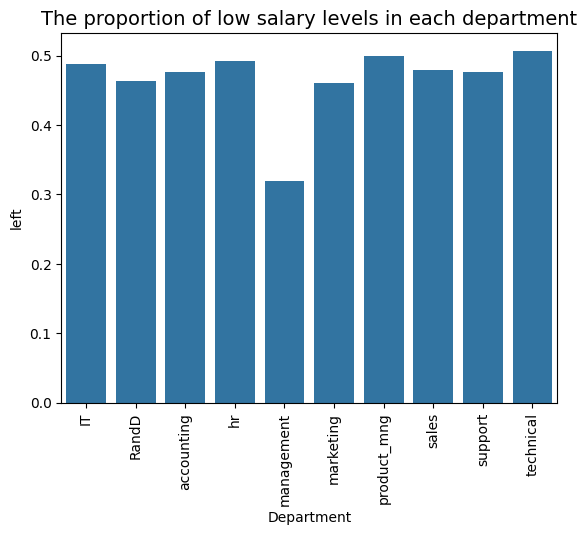

In [43]:

data_mean = data[data['salary']=='low'].groupby(['Department']).count()/data.groupby(['Department']).count()
#print(data_mean)
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
sns.barplot(data=data_mean, x='Department',y='left'
            )
plt.xticks(rotation='vertical')
plt.title('The proportion of low salary levels in each department', fontsize=14)
plt.show()

* From the above chart about the department variable, we can see that the HR, Finance and Technology departments have the highest turnover rate, while the Management department has the lowest turnover rate. Further, to find out the reasons why different departments have an impact on the turnover rate, we can see that in the Management department, the low salary rate of the Management department employees is the smallest. So we can conclude that the highest salary level of the Management department employees may be the reason why the employees in this department have the least turnover. We can see that the salary levels of employees in different departments are not so fair.

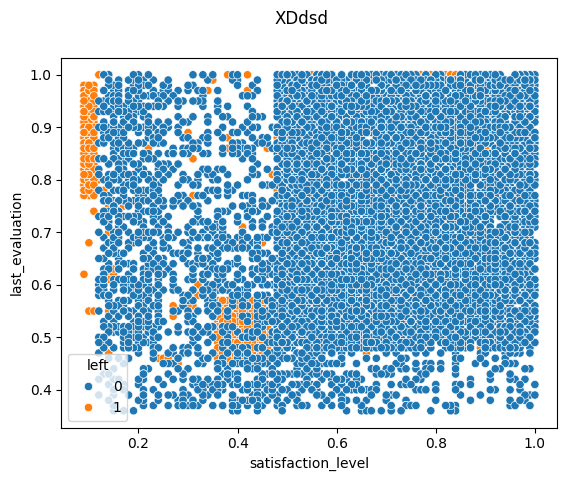

In [44]:
# Create a plot as needed
### YOUR CODE HERE ###
#data_mean = data.groupby('salary')['satisfaction_level'].mean().reset_index()
fig=plt.figure()
sns.scatterplot(data=data,x= 'satisfaction_level',y= 'last_evaluation',hue='left')
fig.suptitle('XDdsd')

plt.show()

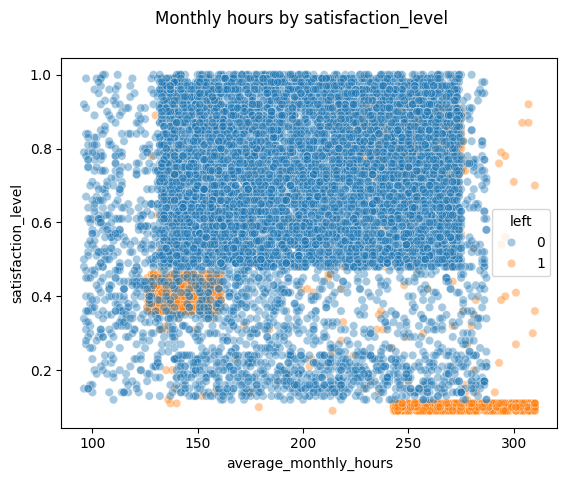

In [45]:
# Create a plot as needed
### YOUR CODE HERE ###
fig=plt.figure()
sns.scatterplot(data=data,y= 'satisfaction_level',x= 'average_monthly_hours',hue='left', alpha=0.4)
fig.suptitle('Monthly hours by satisfaction_level')

plt.show()

* The scatter plot above shows that a significant number of employees quit, who worked around 240-315 hours per month and had very low satisfaction, around 0. 315 hours per month is equivalent to working over 75 hours per week for the whole year, and this overworked situation may be the reason why their satisfaction is close to zero and they want to leave the company.

* There is another group of resigned employees who work more normal hours, around 120-160 hours per week, and their satisfaction is not very low, their satisfaction is only around 0.4. It is difficult to speculate why they left. Considering that many of their colleagues work longer hours, they may feel pressured to work more in the furture. This pressure may have reduced their satisfaction.

* Finally, there is a group of employees who work around 210-280 hours per month, their satisfaction is between 0.7-0.9, which is a fairly high number, and most of them stayed in the company.



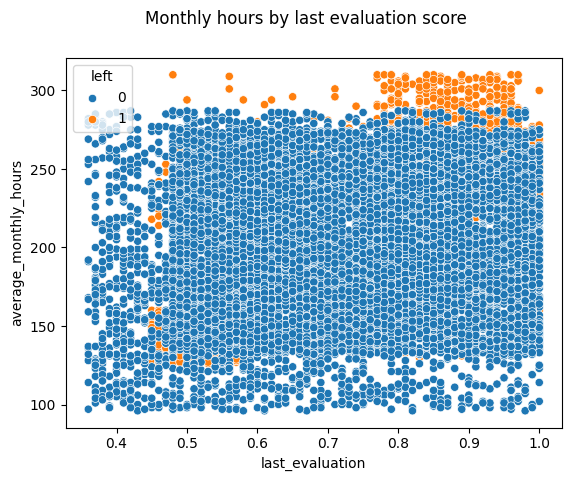

In [46]:
# Create a plot as needed
### YOUR CODE HERE ###
fig=plt.figure()
sns.scatterplot(data=data,x= 'last_evaluation',y= 'average_monthly_hours',hue='left')
fig.suptitle('Monthly hours by last evaluation score')
plt.show()

The following observations can be made from the scatter plot above:
* The scatter plot shows two groups of employees who left: overworked employees who performed well and employees who worked slightly less than the nominal average monthly working hours of 166.67 hours and had low evaluation scores.
* The reason that overworked employees who performed well are resigning could be that employees with good performances are not satisfied with the overwork situation, although they still have good work ethic and plan to leave the company.
* The reason that employees who worked slightly less than the nominal average monthly working hours and had low evaluation scores are resigning could be that those employees are not performing well so the company fired them.
* There seems to be a correlation between working hours and evaluation scores.
* The proportion of employees in the upper left quadrant of the graph is not high; however, working long hours does not guarantee a good evaluation score.
* Most employees in this company work more than 167 hours per month.

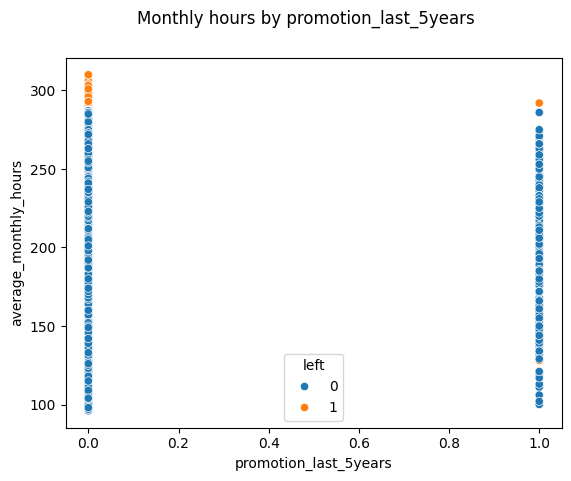

In [49]:
# Create a plot as needed
### YOUR CODE HERE ###
fig=plt.figure()
sns.scatterplot(data=data,x= 'promotion_last_5years',y= 'average_monthly_hours',hue='left')
fig.suptitle('Monthly hours by promotion_last_5years')

plt.show()

* All employees who worked the longest quit, so we can conclude that long working hours are a direct cause of employee resignation.
* Employees who were promoted in the past five years have fewer employees who quit than those who were not promoted.
* Employees who worked the longest and got promoted do not have a higher chance of promotion.

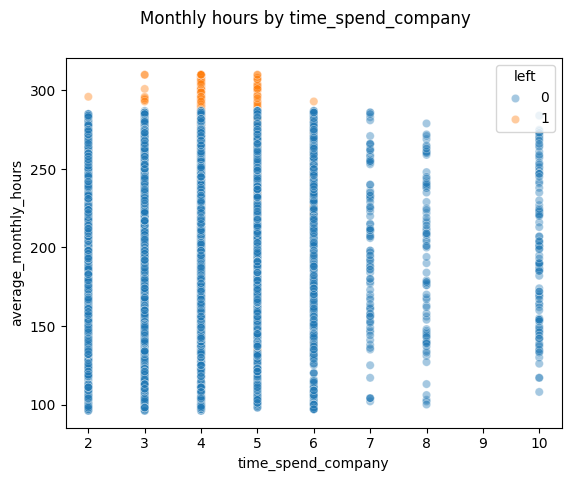

In [50]:
# Create a plot as needed
### YOUR CODE HERE ###
fig=plt.figure()
sns.scatterplot(data=data,x= 'time_spend_company',y= 'average_monthly_hours',hue='left', alpha=0.4)
fig.suptitle('Monthly hours by time_spend_company')
plt.show()

* From this chart, we can see that emplyees who have stayed in the company more than 6 years are not leaving the company, even some of employees are still overworking, they are still staying in the company.
* Almost all employees who are working more than 290 hours per month are leaving the company, so we can conclude that long working hours are a direct cause of employee resignation.

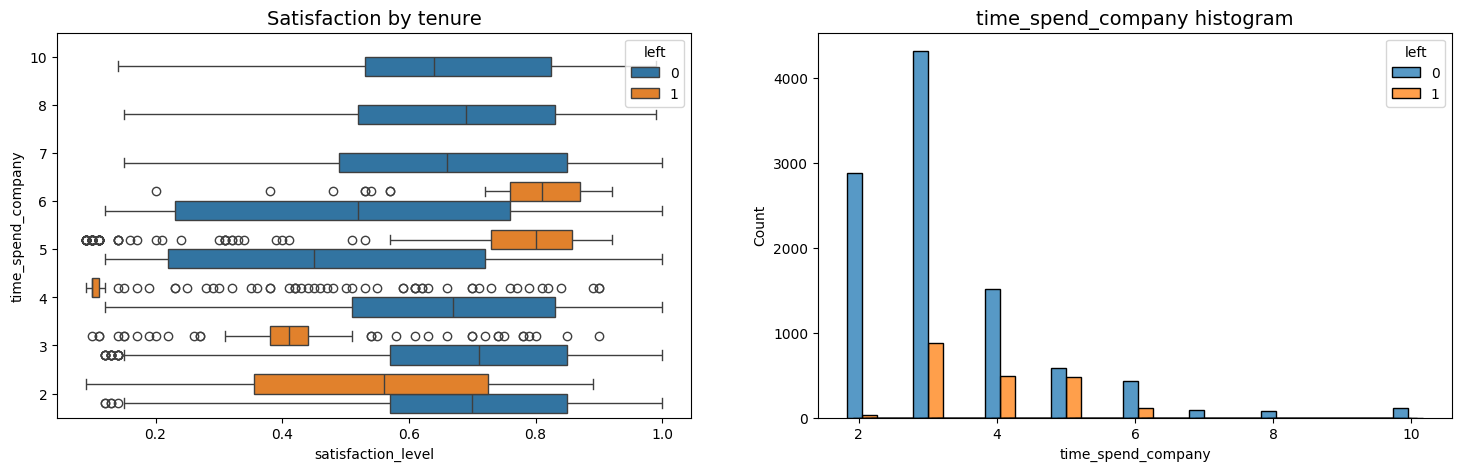

In [54]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (18,5))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=data, x='satisfaction_level', y='time_spend_company', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = data[data['left']==0]['time_spend_company']
tenure_left = data[data['left']==1]['time_spend_company']
sns.histplot(data=data, x='time_spend_company', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('time_spend_company histogram', fontsize='14')

plt.show()

* The employees who left the company fall roughly into two categories: dissatisfied employees with shorter tenure and very satisfied employees with medium tenure.
* The four-year employees who left seem to have unusually low satisfaction. If possible, it would be worth investigating changes in company policies that might particularly affect four-year employees.
* The longest-tenured employees did not leave. Their satisfaction is consistent with the new employees who stayed.
* The histogram shows that there are relatively few employees with longer tenure. They are probably higher-level, higher-paid employees.
* We can conclude that satisfied employees tend to stay with the company, and employees who stay for a long time are always satisfied with the company.


In [174]:
data.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

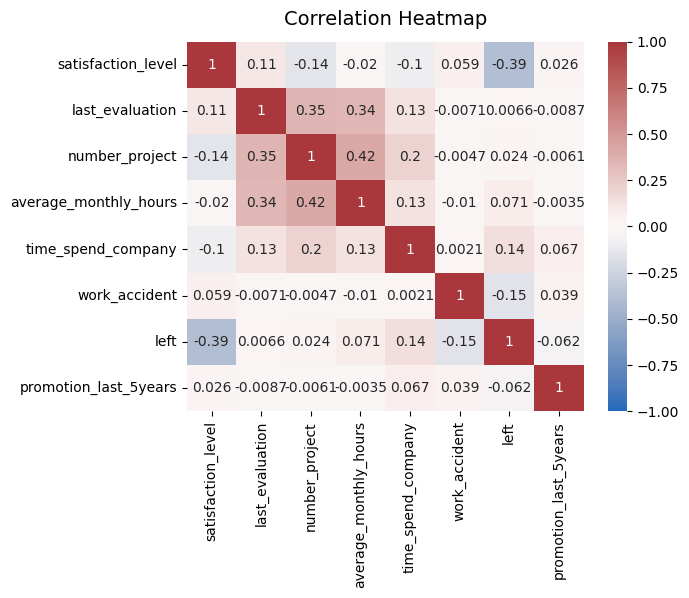

In [173]:
heatmap = sns.heatmap(df0.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

* The correlation heat map confirms that there is a certain positive correlation between the number of projects, monthly working hours and evaluation scores, while there is a negative correlation between employee turnover and employee satisfaction level.

### Insights

* There are some key variables that may influence employee resignation, such as satisfaction, salary level, promotions in the past 5 years, tenure at the company, number of projects, and monthly working hours.
* Employees often leave the company because of low salary.
* Employee turnover is associated with longer working hours, more projects, and generally lower satisfaction.
* Working long hours without getting promotions or good evaluation scores can be unsatisfying.
* Employees who have been with the company for more than six years will stay because they are satisfied with the company, even if some of them have worked long hours.
* Work-related injuries do not directly lead to employees' resignation decisions.
* Employee salary levels are unevenly distributed, and employees in management departments generally receive higher salaries and are willing to stay with the company.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

* The goal of this prediction task is to predict whether an employee will leave the company. Since the target is a binary variable, 0 represents an employee who stays and 1 represents an employee who leaves, our prediction task is a classification task.*

### Identify the types of models most appropriate for this task.

* Since this is a classification task, we plan to try logistic regression model, tree-based machine learning model (Random Forest and tree), XGBoost, and knn.

#### Feature Engineering
* Before building and selecting a suitable turnover status prediction model, we need to consider a key column - satisfaction level, because this variable may directly reflect the employee's satisfaction with the work situation, which may be highly correlated with the employee's turnover results, so there may be some data leakage issues. Since the company may not have the ability to collect satisfaction data for all employees, in actual situations, we may not have this variable. So we decided to delete this column in further prediction tasks.

In [8]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
data = data.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
data.head()



,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
0,0.53,2,157,3,0,1,0,sales,low
1,0.86,5,262,6,0,1,0,sales,medium
2,0.88,7,272,4,0,1,0,sales,medium
3,0.87,5,223,5,0,1,0,sales,low
4,0.52,2,159,3,0,1,0,sales,low


### Modeling

Add as many cells as you need to conduct the modeling process.

In [62]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [9]:
### YOUR CODE HERE ###
# Copy the dataframe
df_encoded = data[['salary','Department']].copy()
onecoder = OneHotEncoder(drop='first')
df_encoded = onecoder.fit_transform(df_encoded).toarray()
aaa= data.drop(columns=['salary','Department']).reset_index(drop=True)
print( onecoder.get_feature_names_out(),df_encoded)
bbb= pd.DataFrame(df_encoded, columns=onecoder.get_feature_names_out())
data_encoded = pd.concat([aaa,bbb],axis=1)


['salary_low' 'salary_medium' 'Department_RandD' 'Department_accounting'
 'Department_hr' 'Department_management' 'Department_marketing'
 'Department_product_mng' 'Department_sales' 'Department_support'
 'Department_technical'] [[1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [14]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = data[(data['time_spend_company'] >= lower_threshold) & (data['time_spend_company'] <= upper_threshold)]

# Display first few rows of new dataframe
df_logreg.head()

,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,Department,salary
0,0.53,2,157,3,0,1,0,sales,low
2,0.88,7,272,4,0,1,0,sales,medium
3,0.87,5,223,5,0,1,0,sales,low
4,0.52,2,159,3,0,1,0,sales,low
5,0.50,2,153,3,0,1,0,sales,low


In [10]:
X = data_encoded.drop('left', axis=1)

# Display the first few rows of the selected features 
y= data_encoded['left']
X

,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary_low,salary_medium,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.53,2,157,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.86,5,262,6,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.88,7,272,4,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.87,5,223,5,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.52,2,159,3,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.55,3,259,10,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11987,0.95,5,266,10,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11988,0.54,3,185,10,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11989,0.65,3,172,10,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [72]:
print(X_train.shape,y_train.shape)

(9592, 17) (9592,)


In [73]:
log_clf = LogisticRegression(random_state=42, max_iter=10000).fit(X_train, y_train)

In [74]:
y_pred = log_clf.predict(X_test)

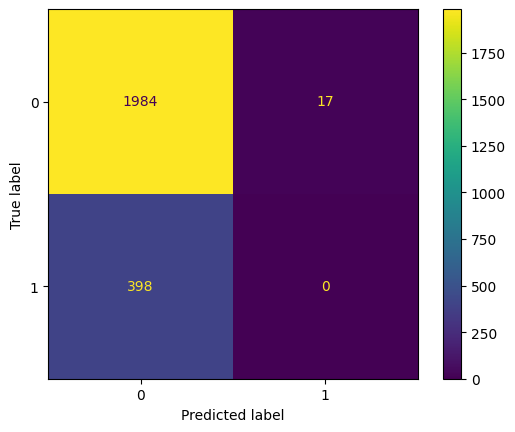

In [75]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [18]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.83      0.99      0.91      2001
    Predicted would leave       0.00      0.00      0.00       398

                 accuracy                           0.83      2399
                macro avg       0.42      0.50      0.45      2399
             weighted avg       0.69      0.83      0.76      2399



In [96]:

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs'],'max_iter':[10000] }# l1 lasso l2 ridge
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, scoring=scoring,cv =5, refit='roc_auc')
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [10000],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [100]:

logreg_cv.cv_results_

log_clf_results = make_results('random forest cv', logreg_cv, 'auc')

print(log_clf_results)

              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.014286  0.000627  0.001201  0.825583  0.720156


In [98]:
logreg_cv.best_score_

0.7201564100201363

In [150]:
y_pred = logreg_cv.best_estimator_.predict(X_test)
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.83      0.99      0.91      2001
    Predicted would leave       0.00      0.00      0.00       398

                 accuracy                           0.83      2399
                macro avg       0.42      0.50      0.45      2399
             weighted avg       0.69      0.83      0.76      2399



In [19]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [20]:
tree1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [21]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [22]:
tree1.best_score_

0.9663762171081101

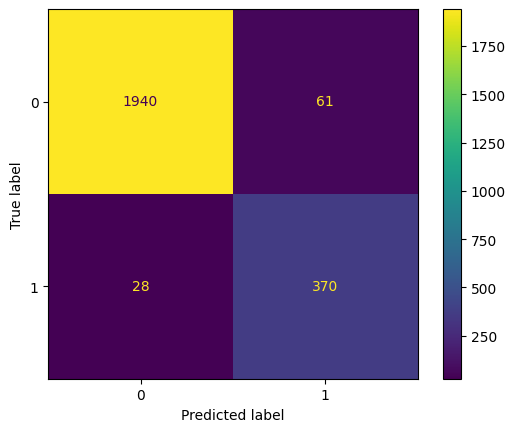

In [151]:
y_pred = tree1.best_estimator_.predict(X_test)
# Compute values for confusion matrix
tree_cm = confusion_matrix(y_test, y_pred, labels=tree1.classes_)

# Create display of confusion matrix
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, 
                                  display_labels=tree1.classes_)

# Plot confusion matrix
tree_disp.plot(values_format='')

# Display plot
plt.show()

In [24]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.836167,0.922158,0.877024,0.957048,0.966376


In [25]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [26]:
rf1.fit(X_train, y_train) 

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [33]:
rf1.best_score_

0.975030295400586

In [34]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

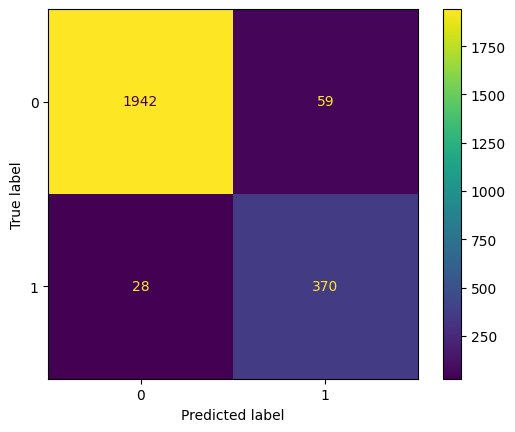

In [152]:
y_pred = rf1.best_estimator_.predict(X_test)
# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, y_pred, labels=rf1.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                                  display_labels=rf1.classes_)

# Plot confusion matrix
rf_disp.plot(values_format='')

# Display plot
plt.show()

In [35]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.836167  0.922158  0.877024  0.957048  0.966376
              model  precision    recall        F1  accuracy      auc
0  random forest cv   0.875892  0.910231  0.892234  0.963303  0.97503


In [37]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [38]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [40]:
xgb_cv.best_score_

0.9070877940103704

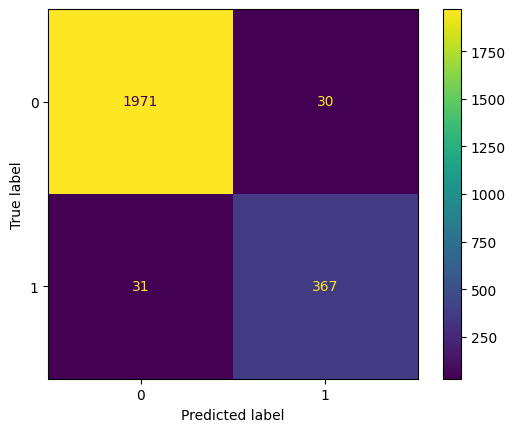

In [153]:
y_pred = xgb_cv.best_estimator_.predict(X_test)
# Compute values for confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred, labels=xgb_cv.classes_)

# Create display of confusion matrix
xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, 
                                  display_labels=xgb_cv.classes_)

# Plot confusion matrix
xgb_disp.plot(values_format='')

# Display plot
plt.show()

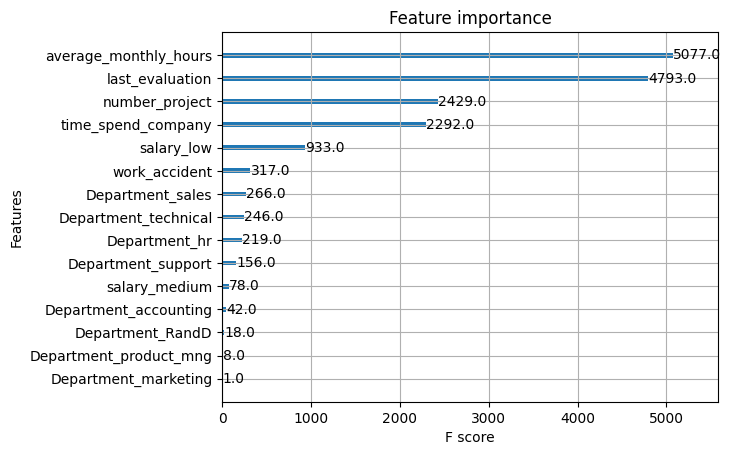

In [154]:
### YOUR CODE HERE ###
plot_importance(xgb_cv.best_estimator_)
plt.show()

In [43]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [44]:
knn_cv = GridSearchCV(KNN, parameters,cv =5)
knn_cv.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.9439119588376158


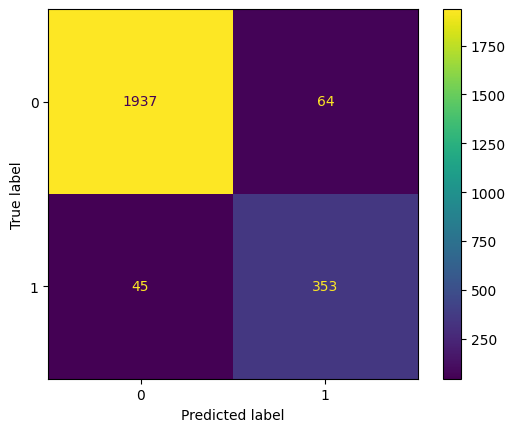

In [155]:
y_pred = knn_cv.best_estimator_.predict(X_test)
# Compute values for confusion matrix
knn_cm = confusion_matrix(y_test, y_pred, labels=knn_cv.classes_)

# Create display of confusion matrix
knn_disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, 
                                  display_labels=knn_cv.classes_)

# Plot confusion matrix
knn_disp.plot(values_format='')

# Display plot
plt.show()

In [50]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
#tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

,gini_importance
last_evaluation,0.289509
number_project,0.273015
average_monthly_hours,0.272495
time_spend_company,0.163373
Department_accounting,0.000856
Department_sales,0.000754
Department_management,0.000000
Department_support,0.000000
Department_product_mng,0.000000
Department_marketing,0.000000


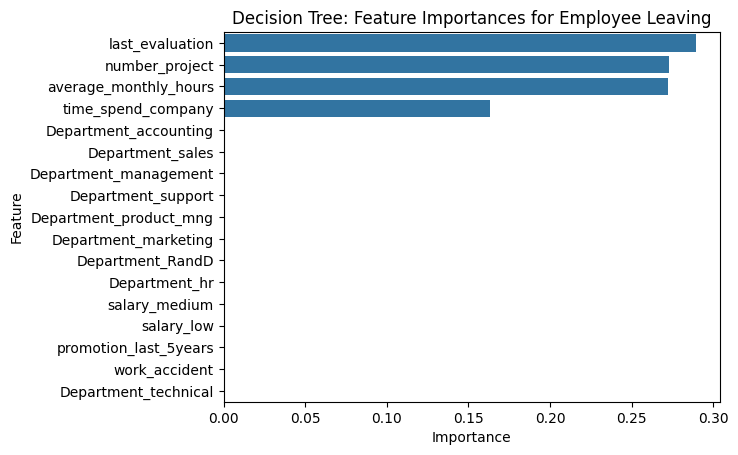

In [156]:
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

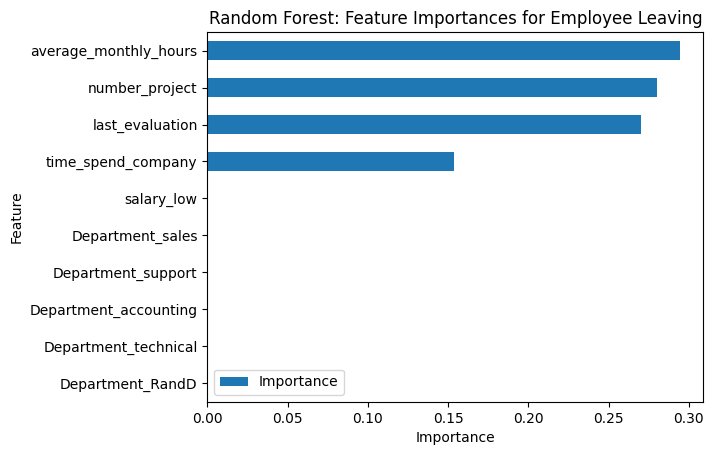

In [49]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



                 models
random forest  0.970793
tree           0.968062
knn            0.954564
xgb            0.922111
logreg         0.827011


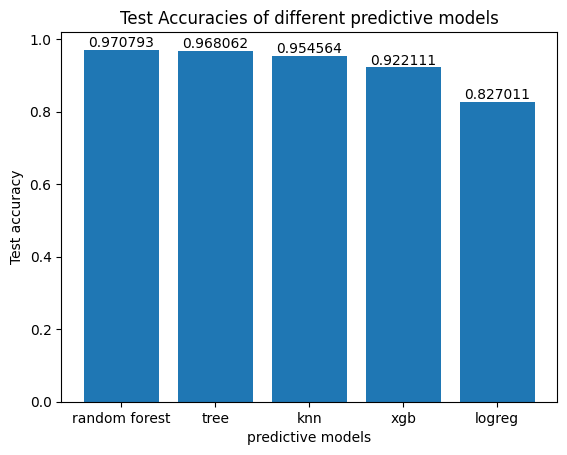

The best performed model is random forest with a test score of 0.9707934977235001


In [149]:
scores = [xgb_cv.score(X_test, y_test),tree1.score(X_test, y_test),knn_cv.score(X_test, y_test),rf1.score(X_test, y_test),log_clf.score(X_test, y_test)]
models =['xgb','tree','knn','random forest','logreg']
performance = pd.DataFrame(scores, 
                              columns=['models'],index =models)
performance = performance.sort_values(by='models', ascending=False)
print(performance)

ax= plt.subplot()
ax.bar(performance.index,height=performance['models'])
ax.set_xlabel('predictive models')
ax.set_ylabel('Test accuracy')
ax.set_title('Test Accuracies of different predictive models') 
#ax.xaxis.set_ticklabels(models)#; ax.yaxis.set_ticklabels(['did not land', 'landed']) 
ax.bar_label(ax.containers[0])
plt.show() 
print('The best performed model is',models[np.argmax(scores)],'with a test score of',max(scores))

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

From the EDA, we can get some insights about the variables effecting the employees' resignation situation:
* There are some key variables that may influence employee resignation, such as satisfaction, salary level, promotions in the past 5 years, tenure at the company, number of projects, and monthly working hours.
* Employees often leave the company because of low salary.
* Employee resignation is associated with longer working hours, more projects, and generally lower satisfaction.
* Working long hours without getting promotions or good evaluation scores can be unsatisfying.
* Employees who have been with the company for more than six years will stay because they are satisfied with the company, even if some of them have worked long hours.
* Work-related injuries do not directly lead to employees' resignation decisions.
* Employee salary levels are unevenly distributed, and employees in management departments generally receive higher salaries and are willing to stay with the company.

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 
**Recommendations**

To retain employees, the following recommendations can be made to stakeholders:

* Limit the number of projects an employee can work on.

* Limit the working hours for all employees, if it's needed, give promotion and increase salary to these overworked employees.

* Investigate the odd situation that employees with four-year tenures are so dissatisfied, try to find out the reason for it.

* If employees are unfamiliar with the company’s overtime pay policy, make it clear to them. If the requirements for workload and vacation time are unclear, make them clear.

* A more fair salary plan should be designed, also consider the department factor.

**Next Steps**

Because evaluations may not be done very often and accurate, in which case predicting employee resignation would be useful without this feature, we should consider the results of the case where we remove "last_evaluation" from the data.
We should also consider using deep learning models for predictions, as they are likely to be more powerful classification models.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.